**Task:** Get the hourly temperature forcast for one day and plot the data.

In [ ]:
import pandas as pd
import numpy
import requests
from datetime import datetime, timedelta

In [ ]:
# coordinates of Ahmedabad city
location = (23.02521336165027, 72.5639312927408)

params = {
	"latitude": location[0],
	"longitude": location[1],
	"hourly": "temperature_2m",
	"models": "best_match",
	"forecast_days": 1,
  "timezone": 'Asia/Kolkata', # Suitable for India
}
url = "https://api.open-meteo.com/v1/forecast"
responses = requests.get(url, params=params)
response = responses.json()

In [ ]:
response

In [ ]:
weather_data = response['hourly']
df = pd.DataFrame(data=weather_data)
df['time'] = pd.to_datetime(df['time'])
df = df.set_index('time')
df.index = df.index.tz_localize('Asia/Kolkata')
df

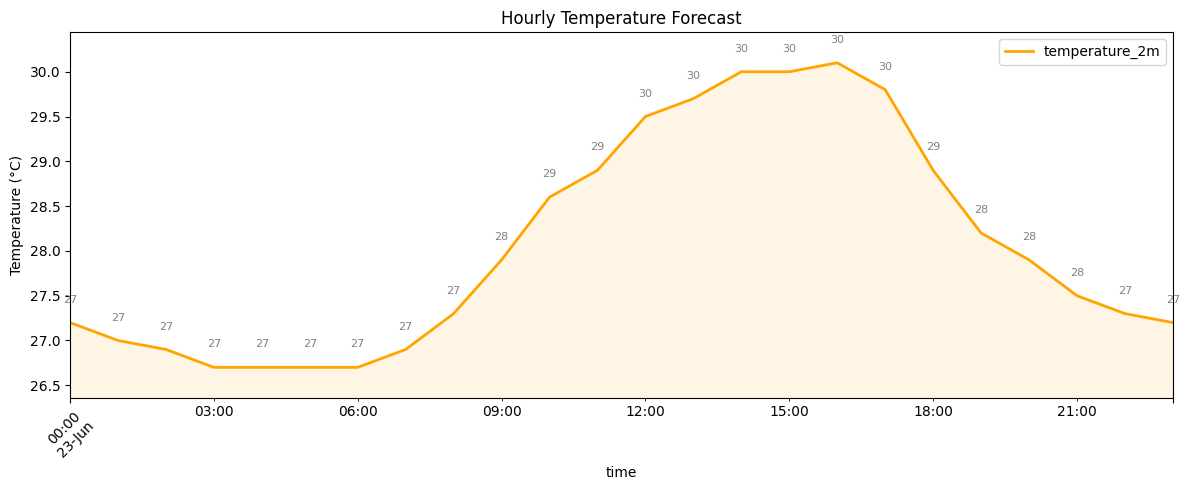

In [35]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

fig, ax = plt.subplots(1, 1)
fig.set_size_inches(12,5)

df.plot(kind='line', ax=ax, color='orange', linewidth=2)
ax.fill_between(df.index, df['temperature_2m'].values, color='orange', alpha=0.1)

y_min = df["temperature_2m"].min()
y_max = df["temperature_2m"].max()
y_range = y_max - y_min
padding = y_range * 0.1  # 10% headroom
ax.set_ylim(y_min - padding, y_max + padding)

# Add data labels
for x, y in zip(df.index, df['temperature_2m']):
    plt.text(x, y + 0.2, f"{int(round(y))}", ha='center', va='bottom', fontsize=8, color='gray')

plt.title("Hourly Temperature Forecast")
plt.ylabel("Temperature (°C)")
plt.xticks(rotation=45)
plt.grid(False)
plt.tight_layout()
plt.show()
